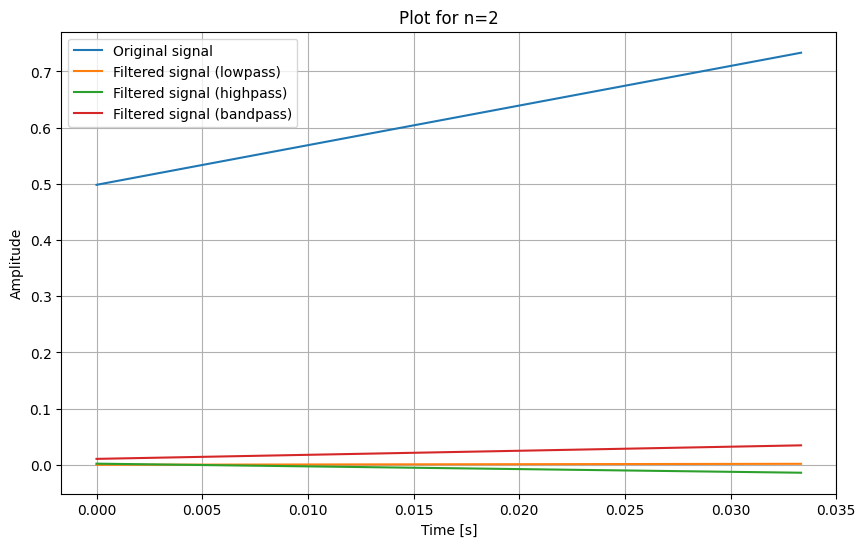

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter

# Função para criar um filtro passa-baixa Butterworth
def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

# Função para criar um filtro passa-alta Butterworth
def butter_highpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='high', analog=False)
    return b, a

# Função para criar um filtro passa-banda Butterworth
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a

# Função para aplicar o filtro a um sinal
def butter_filter(data, cutoff, fs, btype, order=5):
    if btype == 'low':
        b, a = butter_lowpass(cutoff, fs, order=order)
    elif btype == 'high':
        b, a = butter_highpass(cutoff, fs, order=order)
    elif btype == 'band':
        b, a = butter_bandpass(cutoff[0], cutoff[1], fs, order=order)
    y = lfilter(b, a, data)
    return y

# Parâmetros do filtro
order = 6
fs = 30.0       # frequência de amostragem, Hz
lowcut = 3.0    # frequência de corte do filtro passa-baixa, Hz
highcut = 10.0  # frequência de corte do filtro passa-alta, Hz

# Criação de uma série temporal de exemplo
T = 0.1
nsamples = T * fs
t = np.arange(0, nsamples) / fs
a = 0.02
f = np.sin(2*np.pi*1.2*np.sqrt(t))
f += 0.1*np.cos(2*np.pi*312*t+0.1)
f += a*np.cos(2*np.pi*2000*t+.11)
f += 0.03*np.cos(2*np.pi*2000*t+.02)*np.exp(-t/0.05)
f += 0.15*np.cos(2*np.pi*2000*t+.02)
f += 0.2*np.cos(2*np.pi*2000*t+.1)*np.exp(-t/0.3)
x = f.copy()

# Aplicação dos filtros
y_low = butter_filter(x, lowcut, fs, 'low', order)
y_high = butter_filter(x, highcut, fs, 'high', order)
y_band = butter_filter(x, [lowcut, highcut], fs, 'band', order)

# Plot dos resultados para n = 10
n = 2
plt.figure(figsize=(10, 6))
plt.plot(t[:n], x[:n], label='Original signal')
plt.plot(t[:n], y_low[:n], label='Filtered signal (lowpass)')
plt.plot(t[:n], y_high[:n], label='Filtered signal (highpass)')
plt.plot(t[:n], y_band[:n], label='Filtered signal (bandpass)')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend(loc='best')
plt.title(f'Plot for n={n}')
plt.show()


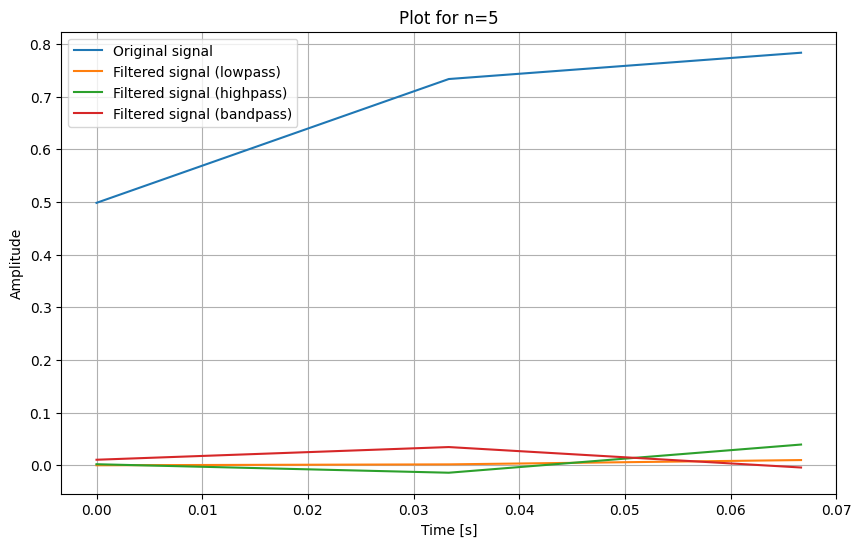

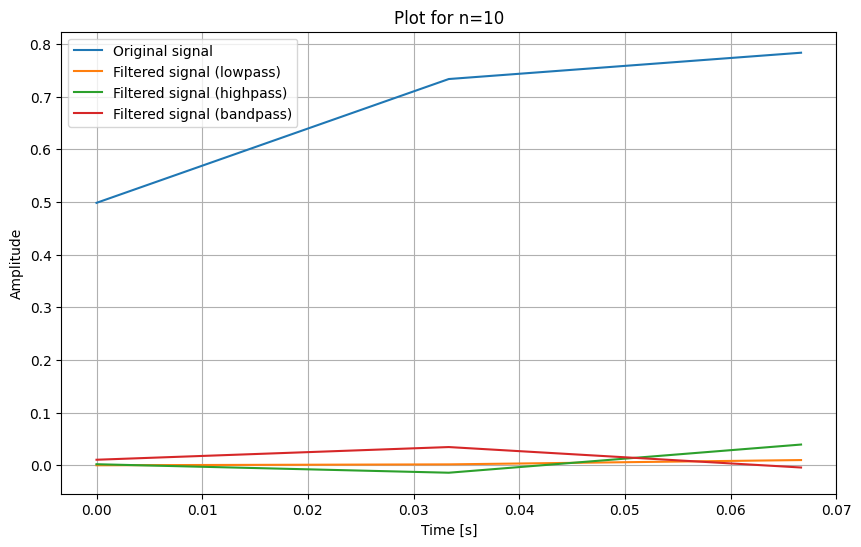

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter

# Função para criar um filtro passa-baixa Butterworth
def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

# Função para criar um filtro passa-alta Butterworth
def butter_highpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='high', analog=False)
    return b, a

# Função para criar um filtro passa-banda Butterworth
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a

# Função para aplicar o filtro a um sinal
def butter_filter(data, cutoff, fs, btype, order=5):
    if btype == 'low':
        b, a = butter_lowpass(cutoff, fs, order=order)
    elif btype == 'high':
        b, a = butter_highpass(cutoff, fs, order=order)
    elif btype == 'band':
        b, a = butter_bandpass(cutoff[0], cutoff[1], fs, order=order)
    y = lfilter(b, a, data)
    return y

# Parâmetros do filtro
order = 6
fs = 30.0       # frequência de amostragem, Hz
lowcut = 3.0    # frequência de corte do filtro passa-baixa, Hz
highcut = 10.0  # frequência de corte do filtro passa-alta, Hz

# Criação de uma série temporal de exemplo
T = 0.1
nsamples = T * fs
t = np.arange(0, nsamples) / fs
a = 0.02
f = np.sin(2*np.pi*1.2*np.sqrt(t))
f += 0.1*np.cos(2*np.pi*312*t+0.1)
f += a*np.cos(2*np.pi*2000*t+.11)
f += 0.03*np.cos(2*np.pi*2000*t+.02)*np.exp(-t/0.05)
f += 0.15*np.cos(2*np.pi*2000*t+.02)
f += 0.2*np.cos(2*np.pi*2000*t+.1)*np.exp(-t/0.3)
x = f.copy()

# Aplicação dos filtros
y_low = butter_filter(x, lowcut, fs, 'low', order)
y_high = butter_filter(x, highcut, fs, 'high', order)
y_band = butter_filter(x, [lowcut, highcut], fs, 'band', order)

# Plot dos resultados para n = 5
n = 5
plt.figure(figsize=(10, 6))
plt.plot(t[:n], x[:n], label='Original signal')
plt.plot(t[:n], y_low[:n], label='Filtered signal (lowpass)')
plt.plot(t[:n], y_high[:n], label='Filtered signal (highpass)')
plt.plot(t[:n], y_band[:n], label='Filtered signal (bandpass)')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend(loc='best')
plt.title(f'Plot for n={n}')
plt.show()

# Plot dos resultados para n = 10
n = 10
plt.figure(figsize=(10, 6))
plt.plot(t[:n], x[:n], label='Original signal')
plt.plot(t[:n], y_low[:n], label='Filtered signal (lowpass)')
plt.plot(t[:n], y_high[:n], label='Filtered signal (highpass)')
plt.plot(t[:n], y_band[:n], label='Filtered signal (bandpass)')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend(loc='best')
plt.title(f'Plot for n={n}')
plt.show()


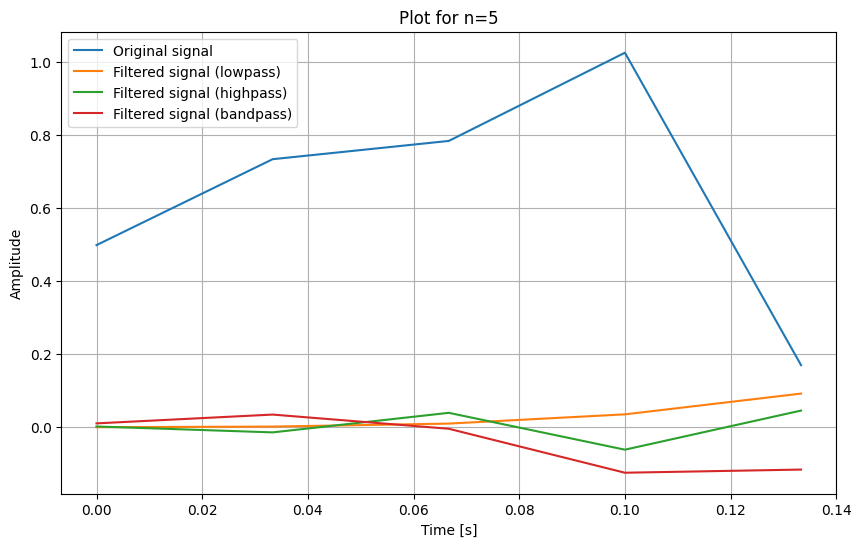

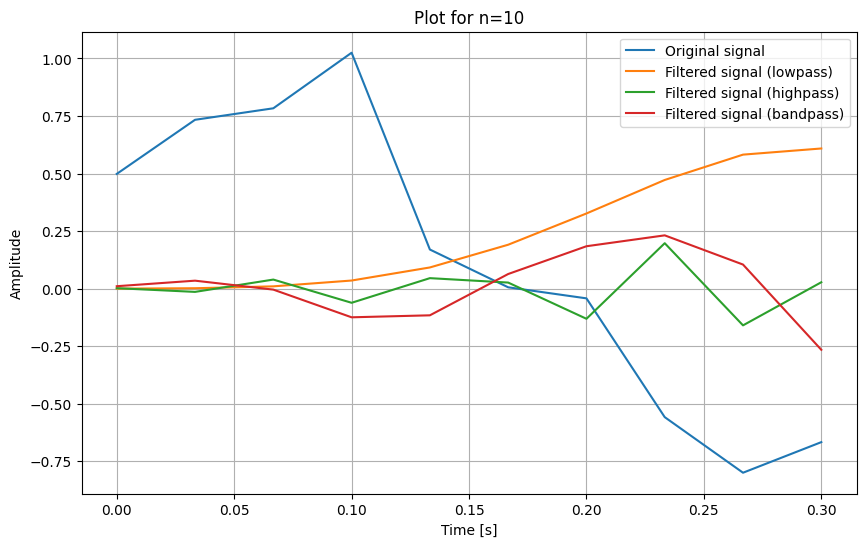

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter

# Função para criar um filtro passa-baixa Butterworth
def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

# Função para criar um filtro passa-alta Butterworth
def butter_highpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='high', analog=False)
    return b, a

# Função para criar um filtro passa-banda Butterworth
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a

# Função para aplicar o filtro a um sinal
def butter_filter(data, cutoff, fs, btype, order=5):
    if btype == 'low':
        b, a = butter_lowpass(cutoff, fs, order=order)
    elif btype == 'high':
        b, a = butter_highpass(cutoff, fs, order=order)
    elif btype == 'band':
        b, a = butter_bandpass(cutoff[0], cutoff[1], fs, order=order)
    y = lfilter(b, a, data)
    return y

# Parâmetros do filtro
order = 6
fs = 30.0       # frequência de amostragem, Hz
lowcut = 3.0    # frequência de corte do filtro passa-baixa, Hz
highcut = 10.0  # frequência de corte do filtro passa-alta, Hz

# Criação de uma série temporal de exemplo
T = 0.5
nsamples = T * fs
t = np.arange(0, nsamples) / fs
a = 0.02
f = np.sin(2*np.pi*1.2*np.sqrt(t))
f += 0.1*np.cos(2*np.pi*312*t+0.1)
f += a*np.cos(2*np.pi*2000*t+.11)
f += 0.03*np.cos(2*np.pi*2000*t+.02)*np.exp(-t/0.05)
f += 0.15*np.cos(2*np.pi*2000*t+.02)
f += 0.2*np.cos(2*np.pi*2000*t+.1)*np.exp(-t/0.3)
x = f.copy()

# Aplicação dos filtros
y_low = butter_filter(x, lowcut, fs, 'low', order)
y_high = butter_filter(x, highcut, fs, 'high', order)
y_band = butter_filter(x, [lowcut, highcut], fs, 'band', order)

# Plot dos resultados para n = 5
n = 5
plt.figure(figsize=(10, 6))
plt.plot(t[:n], x[:n], label='Original signal')
plt.plot(t[:n], y_low[:n], label='Filtered signal (lowpass)')
plt.plot(t[:n], y_high[:n], label='Filtered signal (highpass)')
plt.plot(t[:n], y_band[:n], label='Filtered signal (bandpass)')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend(loc='best')
plt.title(f'Plot for n={n}')
plt.show()

# Plot dos resultados para n = 10
n = 10
plt.figure(figsize=(10, 6))
plt.plot(t[:n], x[:n], label='Original signal')
plt.plot(t[:n], y_low[:n], label='Filtered signal (lowpass)')
plt.plot(t[:n], y_high[:n], label='Filtered signal (highpass)')
plt.plot(t[:n], y_band[:n], label='Filtered signal (bandpass)')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend(loc='best')
plt.title(f'Plot for n={n}')
plt.show()


para 30 e 40

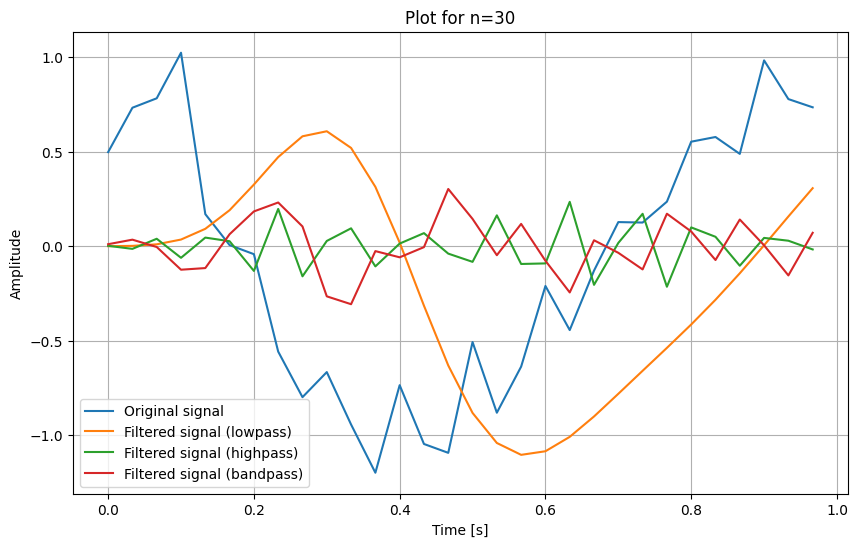

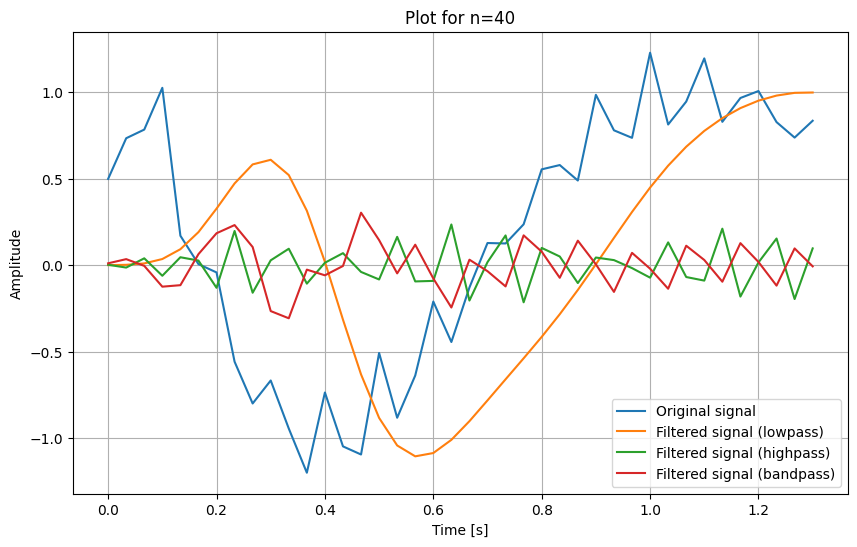

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter

# Função para criar um filtro passa-baixa Butterworth
def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

# Função para criar um filtro passa-alta Butterworth
def butter_highpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='high', analog=False)
    return b, a

# Função para criar um filtro passa-banda Butterworth
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a

# Função para aplicar o filtro a um sinal
def butter_filter(data, cutoff, fs, btype, order=5):
    if btype == 'low':
        b, a = butter_lowpass(cutoff, fs, order=order)
    elif btype == 'high':
        b, a = butter_highpass(cutoff, fs, order=order)
    elif btype == 'band':
        b, a = butter_bandpass(cutoff[0], cutoff[1], fs, order=order)
    y = lfilter(b, a, data)
    return y

# Parâmetros do filtro
order = 6
fs = 30.0       # frequência de amostragem, Hz
lowcut = 3.0    # frequência de corte do filtro passa-baixa, Hz
highcut = 10.0  # frequência de corte do filtro passa-alta, Hz

# Criação de uma série temporal de exemplo
T = 1.5
nsamples = T * fs
t = np.arange(0, nsamples) / fs
a = 0.02
f = np.sin(2*np.pi*1.2*np.sqrt(t))
f += 0.1*np.cos(2*np.pi*312*t+0.1)
f += a*np.cos(2*np.pi*2000*t+.11)
f += 0.03*np.cos(2*np.pi*2000*t+.02)*np.exp(-t/0.05)
f += 0.15*np.cos(2*np.pi*2000*t+.02)
f += 0.2*np.cos(2*np.pi*2000*t+.1)*np.exp(-t/0.3)
x = f.copy()

# Aplicação dos filtros
y_low = butter_filter(x, lowcut, fs, 'low', order)
y_high = butter_filter(x, highcut, fs, 'high', order)
y_band = butter_filter(x, [lowcut, highcut], fs, 'band', order)

# Plot dos resultados para n = 30
n = 30
plt.figure(figsize=(10, 6))
plt.plot(t[:n], x[:n], label='Original signal')
plt.plot(t[:n], y_low[:n], label='Filtered signal (lowpass)')
plt.plot(t[:n], y_high[:n], label='Filtered signal (highpass)')
plt.plot(t[:n], y_band[:n], label='Filtered signal (bandpass)')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend(loc='best')
plt.title(f'Plot for n={n}')
plt.show()

# Plot dos resultados para n = 40
n = 40
plt.figure(figsize=(10, 6))
plt.plot(t[:n], x[:n], label='Original signal')
plt.plot(t[:n], y_low[:n], label='Filtered signal (lowpass)')
plt.plot(t[:n], y_high[:n], label='Filtered signal (highpass)')
plt.plot(t[:n], y_band[:n], label='Filtered signal (bandpass)')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend(loc='best')
plt.title(f'Plot for n={n}')
plt.show()


Segunda tentativa

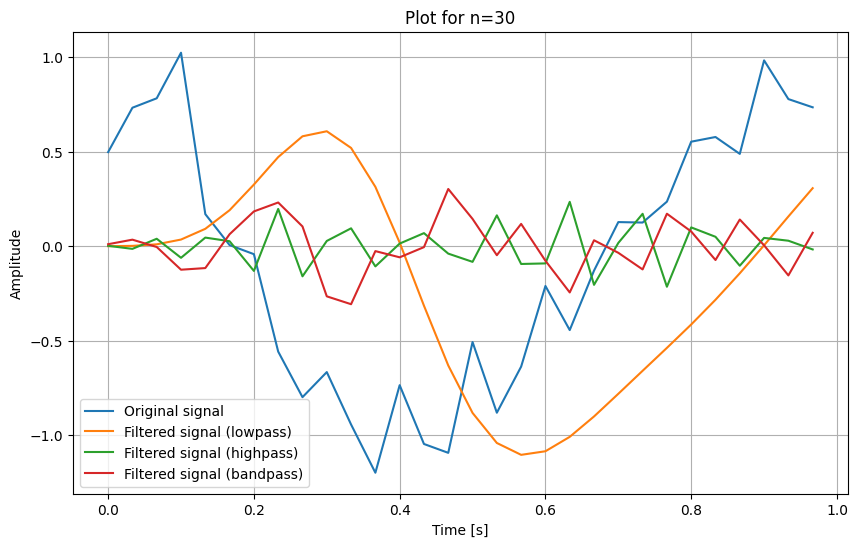

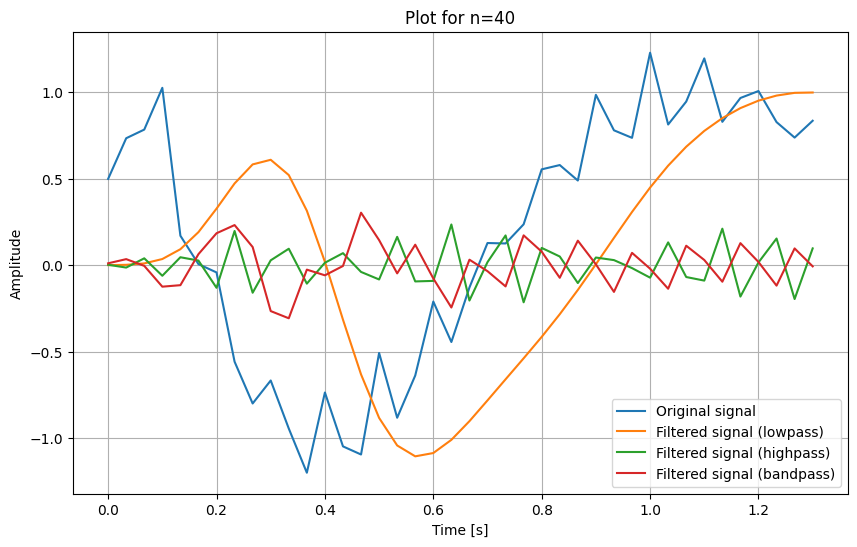

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter

# Função para criar um filtro passa-baixa Butterworth
def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

# Função para criar um filtro passa-alta Butterworth
def butter_highpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='high', analog=False)
    return b, a

# Função para criar um filtro passa-banda Butterworth
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a

# Função para aplicar o filtro a um sinal
def butter_filter(data, cutoff, fs, btype, order=5):
    if btype == 'low':
        b, a = butter_lowpass(cutoff, fs, order=order)
    elif btype == 'high':
        b, a = butter_highpass(cutoff, fs, order=order)
    elif btype == 'band':
        b, a = butter_bandpass(cutoff[0], cutoff[1], fs, order=order)
    y = lfilter(b, a, data)
    return y

# Parâmetros do filtro
order = 6
fs = 30.0       # frequência de amostragem, Hz
lowcut = 3.0    # frequência de corte do filtro passa-baixa, Hz
highcut = 10.0  # frequência de corte do filtro passa-alta, Hz

# Criação de uma série temporal de exemplo
T = 3.0
nsamples = T * fs
t = np.arange(0, nsamples) / fs
a = 0.02
f = np.sin(2*np.pi*1.2*np.sqrt(t))
f += 0.1*np.cos(2*np.pi*312*t+0.1)
f += a*np.cos(2*np.pi*2000*t+.11)
f += 0.03*np.cos(2*np.pi*2000*t+.02)*np.exp(-t/0.05)
f += 0.15*np.cos(2*np.pi*2000*t+.02)
f += 0.2*np.cos(2*np.pi*2000*t+.1)*np.exp(-t/0.3)
x = f.copy()

# Aplicação dos filtros
y_low = butter_filter(x, lowcut, fs, 'low', order)
y_high = butter_filter(x, highcut, fs,'high', order)
y_band = butter_filter(x, [lowcut, highcut], fs, 'band', order)

# Plot dos resultados para n = 30
n = 30
plt.figure(figsize=(10, 6))
plt.plot(t[n-30:n], x[n-30:n], label='Original signal')
plt.plot(t[n-30:n], y_low[n-30:n], label='Filtered signal (lowpass)')
plt.plot(t[n-30:n], y_high[n-30:n], label='Filtered signal (highpass)')
plt.plot(t[n-30:n], y_band[n-30:n], label='Filtered signal (bandpass)')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend(loc='best')
plt.title(f'Plot for n={n}')
plt.show()

# Plot dos resultados para n = 40
n = 40
plt.figure(figsize=(10, 6))
plt.plot(t[n-40:n], x[n-40:n], label='Original signal')
plt.plot(t[n-40:n], y_low[n-40:n], label='Filtered signal (lowpass)')
plt.plot(t[n-40:n], y_high[n-40:n], label='Filtered signal (highpass)')
plt.plot(t[n-40:n], y_band[n-40:n], label='Filtered signal (bandpass)')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend(loc='best')
plt.title(f'Plot for n={n}')
plt.show()
